In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target


In [53]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [54]:
# Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dff = pd.DataFrame(X_scaled, columns=iris.feature_names)

In [55]:
dff.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [56]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [57]:
dff.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


C:\Users\nisch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nisch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nisch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nisch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

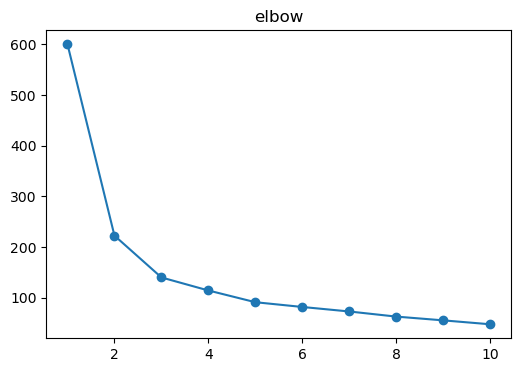

In [58]:
# Applying K-means clustering
list=[]
cl = [i for i in range(1,11)]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans_labels = kmeans.fit(dff)
    list.append(kmeans_labels.inertia_)

#Plotting
plt.figure(figsize=(6, 4))
plt.plot(cl,list, marker = "o")
plt.title('elbow')

plt.show()


C:\Users\nisch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nisch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans Scores:
Kmeans: 0.5817500491982808


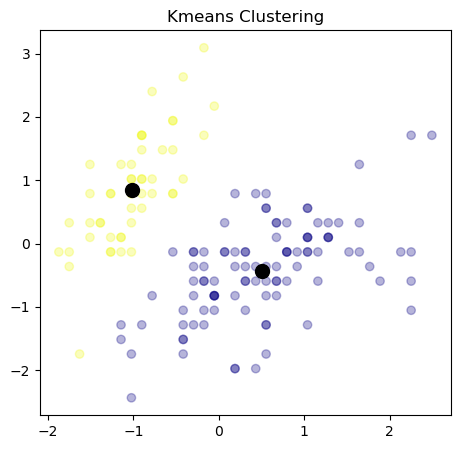

In [59]:

# Initializing and fitting KMeans
Kmeans = KMeans(n_clusters=2, random_state=42)
Kmeans_labels = Kmeans.fit(dff)
output_2 = Kmeans_labels.labels_
centroids_2 = Kmeans_labels.cluster_centers_

# Calculating the silhouette score
Kmeans_silhouette = silhouette_score(dff, output_2)
print("KMeans Scores:")
print(f"Kmeans: {Kmeans_silhouette}")

# Plotting
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 2)
plt.scatter(dff['sepal length (cm)'], dff['sepal width (cm)'], c=output_2, cmap='plasma', alpha=0.3)
plt.scatter(centroids_2[:, 0], centroids_2[:, 1], c='black', marker='o', s=100)  # Increase size for visibility
plt.title('Kmeans Clustering')
plt.show()




C:\Users\nisch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nisch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans Scores:
Kmeans: 0.45994823920518635


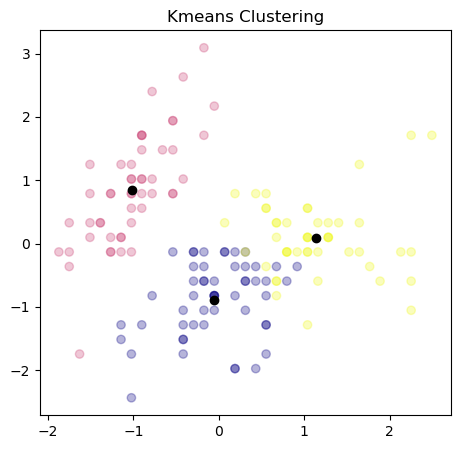

In [60]:
# Applying k means clustering
Kmeans = KMeans(n_clusters=3, random_state=42)
Kmeans_labels =  Kmeans.fit(dff)
output_3 = Kmeans_labels.labels_
centroids_3 = Kmeans_labels.cluster_centers_

# Calculating the silhouette score
Kmeans_silhouette = silhouette_score(dff, output_3)
print("KMeans Scores:")
print(f"Kmeans: {Kmeans_silhouette}")

#Plotting
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 2)
plt.scatter(dff['sepal length (cm)'], dff['sepal width (cm)'], c=output_3, cmap='plasma', alpha = 0.3)
plt.scatter(centroids_3[:,0],centroids_3[:,1], c = 'black', marker = 'o')
plt.title('Kmeans Clustering')
plt.show()



C:\Users\nisch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nisch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans Scores:
Kmeans: 0.38694104154427816


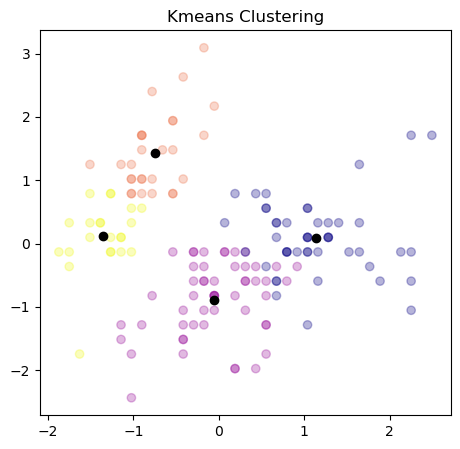

In [61]:

# Applying k means clustering
Kmeans = KMeans(n_clusters=4, random_state=42)
Kmeans_labels =  Kmeans.fit(dff)
output_4 = Kmeans_labels.labels_
centroids_4 = Kmeans_labels.cluster_centers_

# Calculating the silhouette score
Kmeans_silhouette = silhouette_score(dff, output_4)
print("KMeans Scores:")
print(f"Kmeans: {Kmeans_silhouette}")

#Plotting
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 2)
plt.scatter(dff['sepal length (cm)'], dff['sepal width (cm)'], c=output_4, cmap='plasma', alpha = 0.3)
plt.scatter(centroids_4[:,0],centroids_4[:,1], c = 'black', marker = 'o')
plt.title('Kmeans Clustering')
plt.show()



In [62]:
pd.crosstab(y,output_3)

col_0,0,1,2
row_0,,,
0,0,50,0
1,39,0,11
2,14,0,36


In [63]:
unique, counts = np.unique(kmeans_labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print(cluster_sizes)

{KMeans(n_clusters=10, random_state=42): 1}


Silhouette Scores:
Hierarchical: 0.5817500491982808


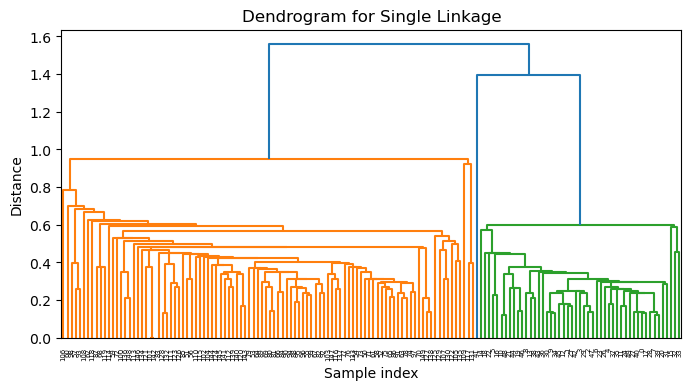

In [64]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming 'dff' is your DataFrame and it's already preprocessed

# Applying Hierarchical clustering
hierarchical1 = AgglomerativeClustering(linkage = 'single')
single_h = hierarchical1.fit_predict(dff)
hierarchical_silhouette_single = silhouette_score(dff, single_h)
print("Silhouette Scores:")
print(f"Hierarchical: {hierarchical_silhouette_single}")


linkage_matrix = linkage(dff, method='single')
plt.figure(figsize=(8, 4))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Single Linkage')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()



Silhouette Scores:
Hierarchical: 0.4408120710597799


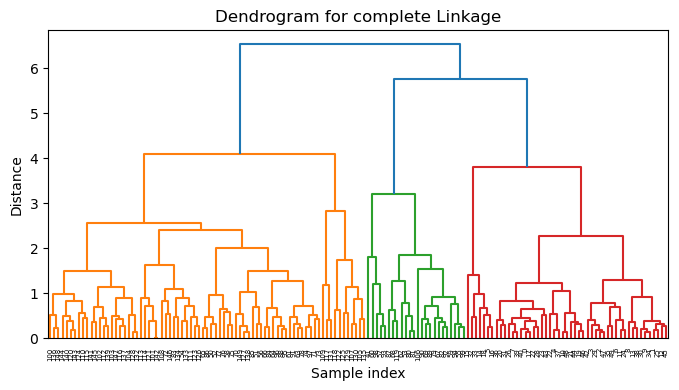

In [65]:
# Applying Hierarchical clustering
hierarchical2 = AgglomerativeClustering(linkage = 'complete')
complete_h = hierarchical2.fit_predict(dff)
hierarchical_silhouette_complete = silhouette_score(dff, complete_h)
print("Silhouette Scores:")
print(f"Hierarchical: {hierarchical_silhouette_complete}")
linkage_matrix = linkage(dff, method='complete')
plt.figure(figsize=(8, 4))
dendrogram(linkage_matrix)
plt.title('Dendrogram for complete Linkage')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()



Silhouette Scores:
Hierarchical: 0.5817500491982808


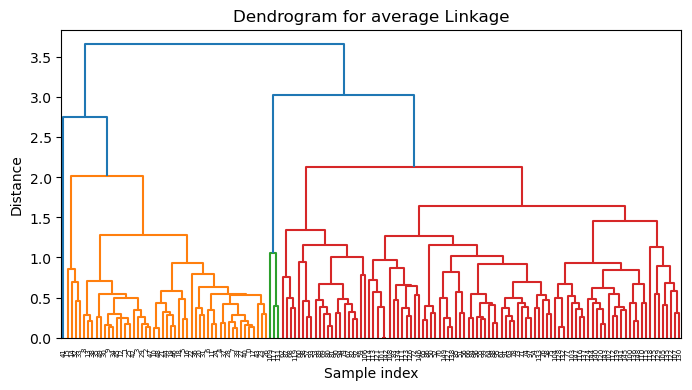

In [66]:
# Applying Hierarchical clustering
hierarchical3 = AgglomerativeClustering(linkage = 'average')
average_h = hierarchical3.fit_predict(dff)
hierarchical_silhouette_average = silhouette_score(dff, average_h)
print("Silhouette Scores:")
print(f"Hierarchical: {hierarchical_silhouette_average}")
linkage_matrix = linkage(dff, method='average')
plt.figure(figsize=(8, 4))
dendrogram(linkage_matrix)
plt.title('Dendrogram for average Linkage')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()



Silhouette Scores:
Hierarchical: 0.5770346019475988


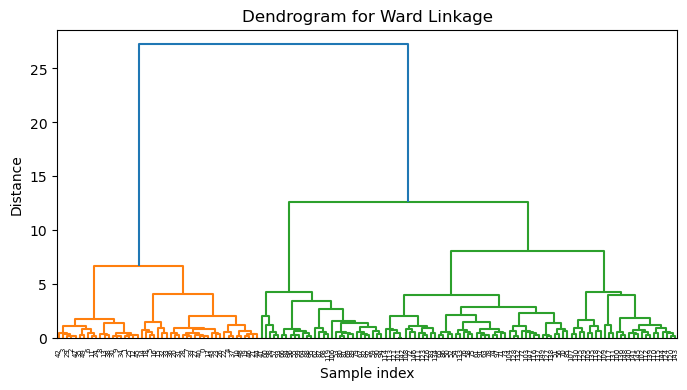

In [67]:

# Applying Hierarchical clustering
hierarchical4 = AgglomerativeClustering(linkage = 'ward')
ward_h = hierarchical4.fit_predict(dff)
hierarchical_silhouette_ward = silhouette_score(dff, ward_h)
print("Silhouette Scores:")
print(f"Hierarchical: {hierarchical_silhouette_ward}")
linkage_matrix = linkage(dff, method='ward')
plt.figure(figsize=(8, 4))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Ward Linkage')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


Silhouette Scores:
DBSCAN: 0.35651648142700726


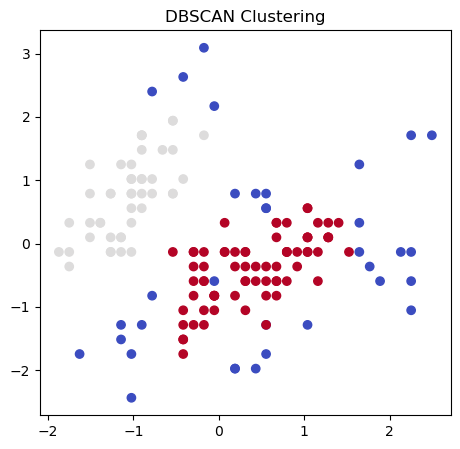

Silhouette Scores:
DBSCAN: 0.5382884306788227


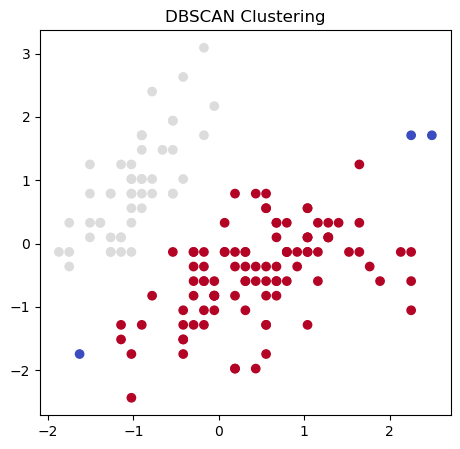

Silhouette Scores:
DBSCAN: 0.504645610832545


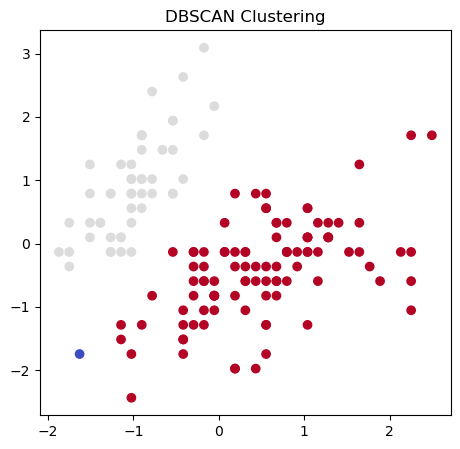

In [68]:
#Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(dff)

dbscan_silhouette = silhouette_score(dff, dbscan_labels)

print("Silhouette Scores:")
print(f"DBSCAN: {dbscan_silhouette}")

#Plotting
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 3)
plt.scatter(dff['sepal length (cm)'], dff['sepal width (cm)'], c=dbscan_labels, cmap='coolwarm')
plt.title('DBSCAN Clustering')

plt.show()


#Applying DBSCAN
dbscan = DBSCAN(eps=1, min_samples=6)
dbscan_labels = dbscan.fit_predict(dff)
dbscan_silhouette = silhouette_score(dff, dbscan_labels)
print("Silhouette Scores:")
print(f"DBSCAN: {dbscan_silhouette}")

#Plotting
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 3)
plt.scatter(dff['sepal length (cm)'], dff['sepal width (cm)'], c=dbscan_labels, cmap='coolwarm')
plt.title('DBSCAN Clustering')

plt.show()



#Applying DBSCAN
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan_labels = dbscan.fit_predict(dff)
dbscan_silhouette = silhouette_score(dff, dbscan_labels)
print("Silhouette Scores:")
print(f"DBSCAN: {dbscan_silhouette}")

#Plotting
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 3)
plt.scatter(dff['sepal length (cm)'], dff['sepal width (cm)'], c=dbscan_labels, cmap='coolwarm')
plt.title('DBSCAN Clustering')

plt.show()



